# SVM ( Salary DataSet ) 

### Problem Statement:
Prepare a classification model using SVM for salary data.  

# ============================================================= 

# 1.  <u>Data Description : 

**age --** age of a person

**workclass	--** A work class is a grouping of work 

**education	--** Education of an individuals	

**maritalstatus --** Marital status of an individulas	

**occupation	 --** occupation of an individuals	

**race --**  Race of an Individual

**sex --**  Gender of an Individual

**capitalgain --**  profit received from the sale of an investment	

**capitalloss	--** A decrease in the value of a capital asset

**hoursperweek --** number of hours work per week	

**native --** Native of an individual

**Salary --** salary of an individual

# 2. <u> Import Neccesery Libraries -  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# 3. <u>Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 4.<u>Import Dataset -  

In [3]:
salary_train_data = pd.read_csv('SalaryData_Train(1).csv')
salary_train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_test_data = pd.read_csv('SalaryData_Test(1).csv')
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# 4. <u> EDA and Preprocessing -  

In [5]:
salary_train_data.shape

(30161, 14)

In [6]:
salary_test_data.shape

(15060, 14)

In [7]:
salary_train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
salary_test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
salary_train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
salary_test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
salary_train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
salary_test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [13]:
pd.crosstab(salary_train_data['occupation'],salary_train_data['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [14]:
pd.crosstab(salary_test_data['occupation'],salary_test_data['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1561,258
Armed-Forces,2,3
Craft-repair,1543,447
Exec-managerial,1062,930
Farming-fishing,434,57
Handlers-cleaners,644,52
Machine-op-inspct,884,120
Other-service,1532,64
Priv-house-serv,87,2


In [15]:
# frequency for categorical fields 

category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for i in category_col:
    print (i)
    print (salary_train_data[i].value_counts())
    print('\n')
    

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cler

# 5. <u> Data Visualization -  

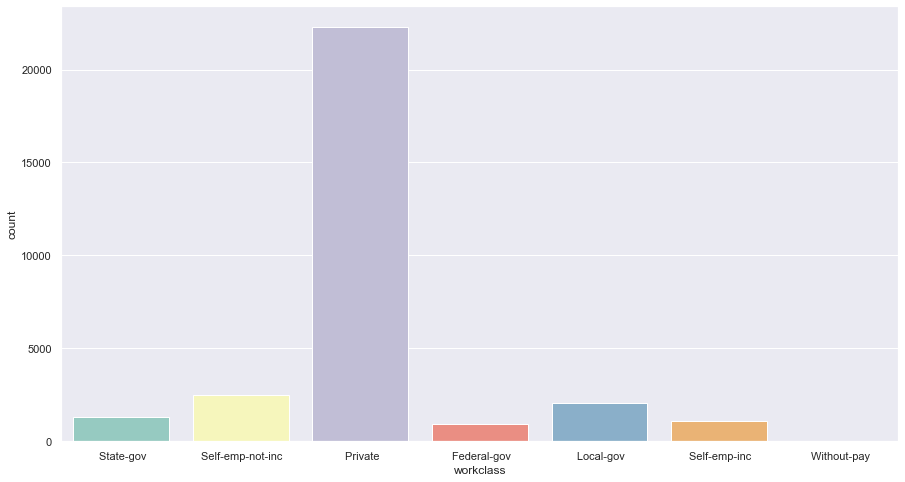

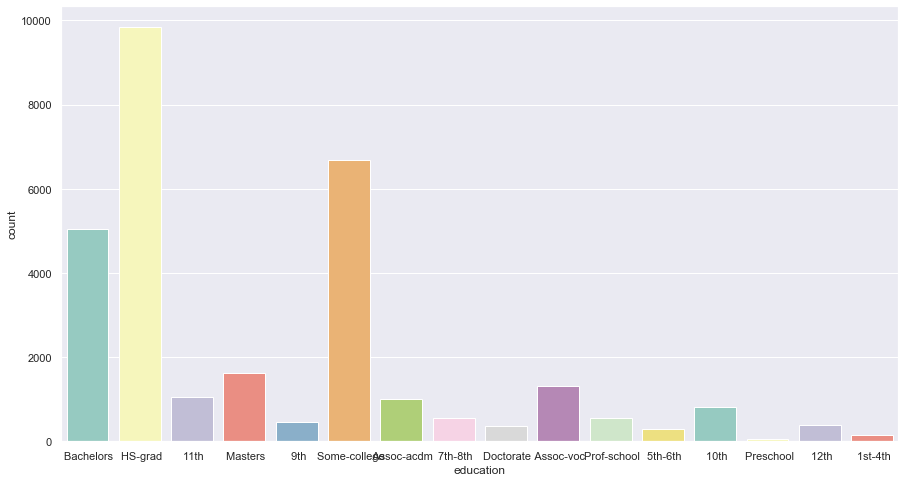

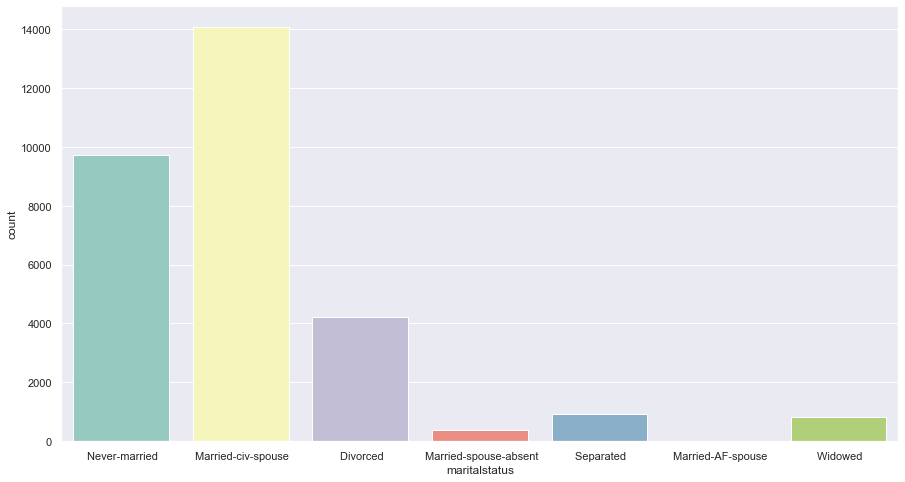

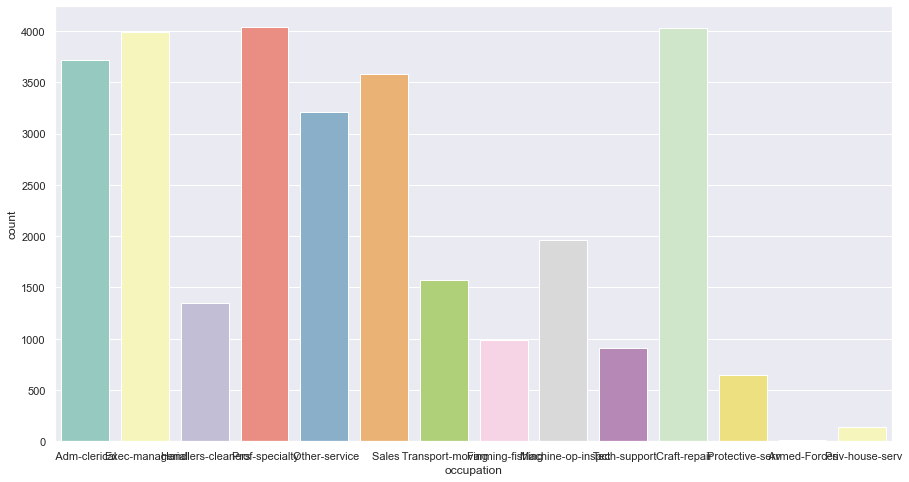

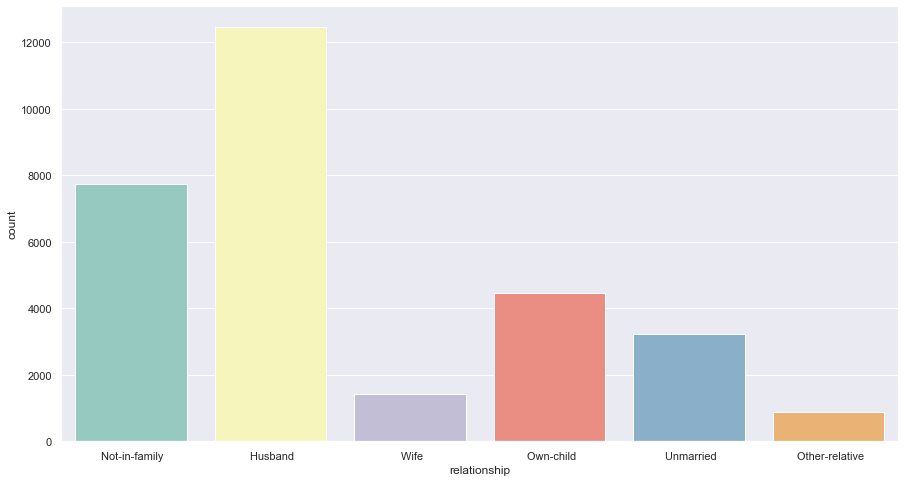

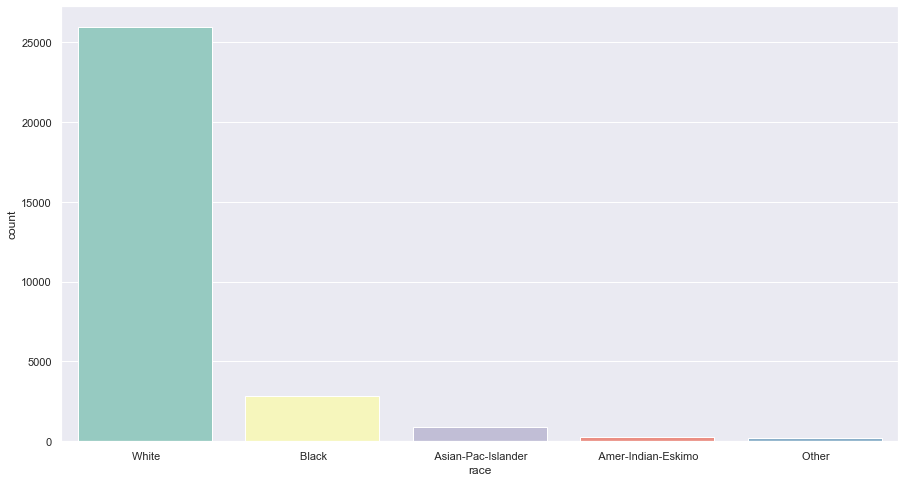

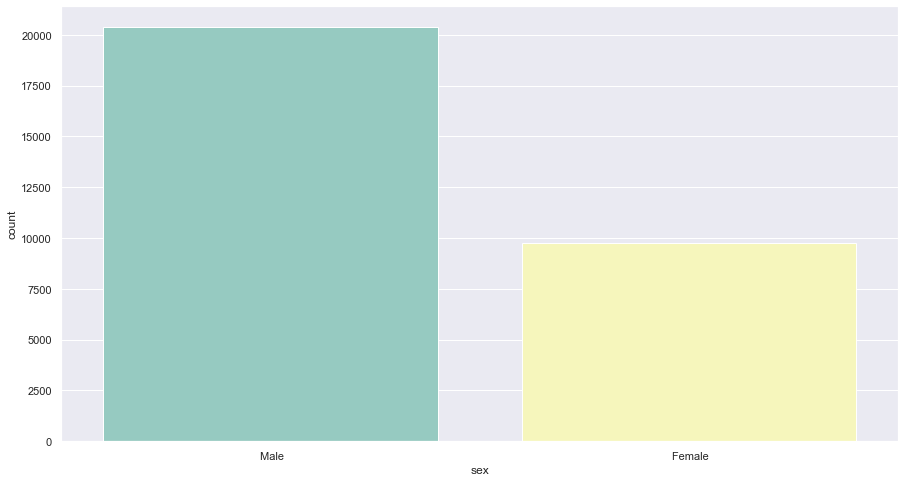

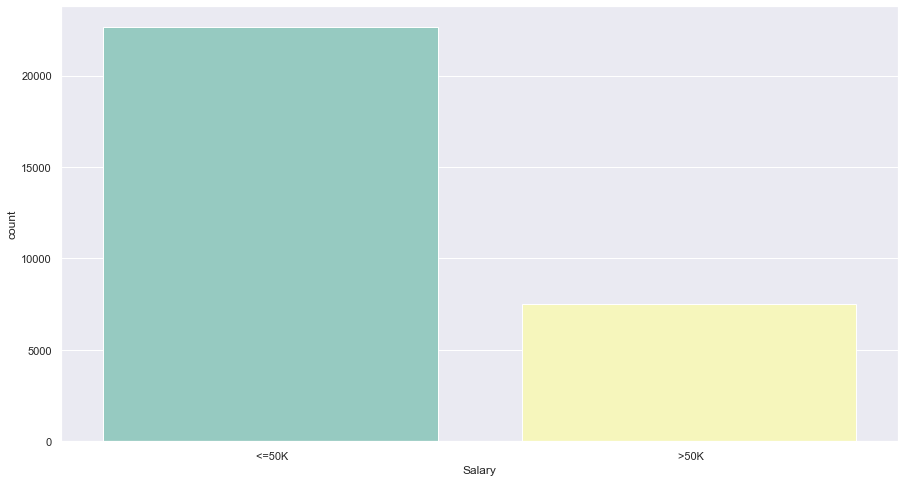

In [16]:
# countplot for all categorical columns

sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = salary_train_data, palette = 'Set3');

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

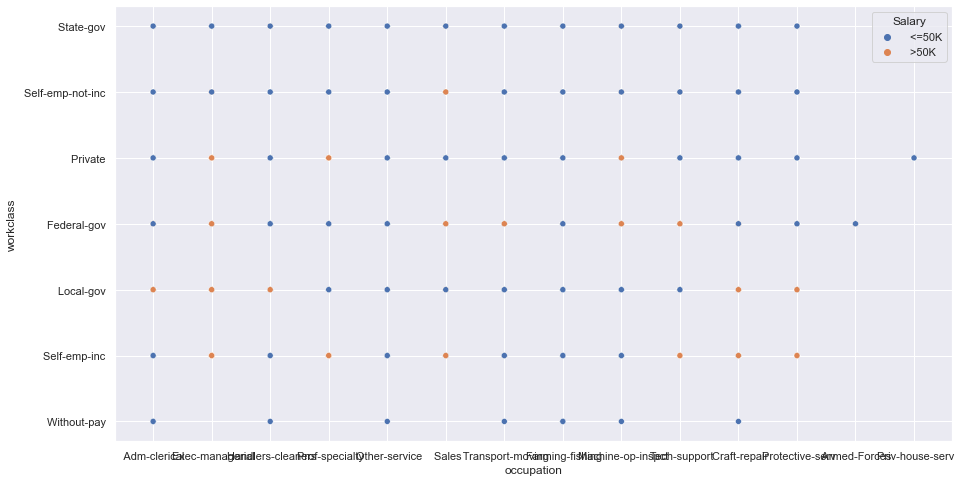

In [17]:
sns.scatterplot(salary_train_data['occupation'],salary_train_data['workclass'],hue=salary_train_data['Salary'])

# 6. <u> Data Preparation -  

## Label Encoding  

In [18]:
from sklearn.preprocessing import LabelEncoder

salary_train_data = salary_train_data.apply(LabelEncoder().fit_transform)
salary_train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [19]:
salary_test_data = salary_test_data.apply(LabelEncoder().fit_transform)
salary_test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [20]:
x_train = salary_train_data.drop(labels='Salary',axis=1)
y_train = salary_train_data['Salary']

In [21]:
x_test = salary_test_data.drop(labels='Salary',axis=1)
y_test = salary_test_data['Salary']

In [22]:
x_train.shape,y_train.shape

((30161, 13), (30161,))

In [23]:
x_test.shape,y_test.shape

((15060, 13), (15060,))

## Normalization 

In [24]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# 7. <u> Model Building -  

# Linear 

In [26]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

### Train 

In [27]:
y_train_pred = model_linear.predict(x_train)

accuracyscore is    :  0.805
precision is        :  0.774
AUc score is        :  0.638
recall value is     :  0.306
comfusion matrix:


<AxesSubplot:>

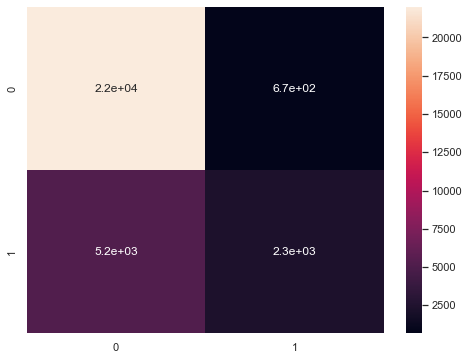

In [42]:
print('accuracyscore is    : ',round(accuracy_score(y_train,y_train_pred),3))
print('precision is        : ',round(precision_score(y_train,y_train_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_train,y_train_pred),3))
print('recall value is     : ',round(recall_score(y_train,y_train_pred),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred)
sns.heatmap(data = confu_matrix,
            annot=True)

### Test

In [43]:
y_test_pred = model_linear.predict(x_test)

accuracyscore is    :  0.803
precision is        :  0.747
AUc score is        :  0.634
recall value is     :  0.302
comfusion matrix:


<AxesSubplot:>

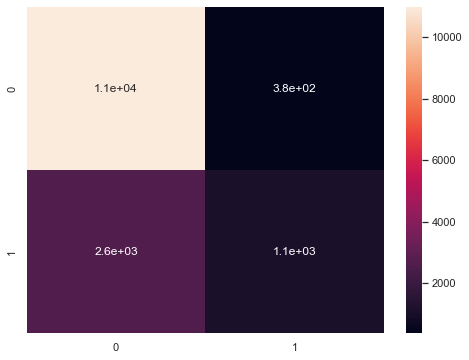

In [44]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_test_pred),3))
print('precision is        : ',round(precision_score(y_test,y_test_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_test_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_test_pred),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data = confu_matrix,
            annot=True)

# Poly 

In [46]:
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)

### Train 

In [47]:
model_poly.fit(x_train,y_train)

SVC(gamma=0.1, kernel='poly', random_state=40)

In [49]:
y_train_pred_poly = model_poly.predict(x_train)

accuracyscore is    :  0.834
precision is        :  0.776
AUc score is        :  0.713
recall value is     :  0.47
comfusion matrix:


<AxesSubplot:>

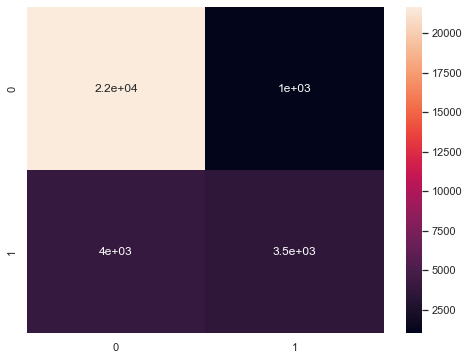

In [50]:
print('accuracyscore is    : ',round(accuracy_score(y_train,y_train_pred_poly),3))
print('precision is        : ',round(precision_score(y_train,y_train_pred_poly),3))
print('AUc score is        : ',round(roc_auc_score(y_train,y_train_pred_poly),3))
print('recall value is     : ',round(recall_score(y_train,y_train_pred_poly),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred_poly)
sns.heatmap(data = confu_matrix,
            annot=True)

### Test

In [51]:
y_test_pred_poly = model_poly.predict(x_test)

accuracyscore is    :  0.832
precision is        :  0.751
AUc score is        :  0.711
recall value is     :  0.474
comfusion matrix:


<AxesSubplot:>

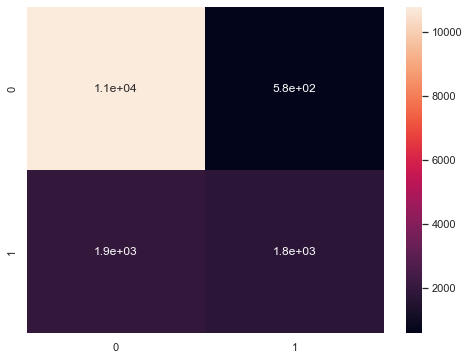

In [52]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_test_pred_poly),3))
print('precision is        : ',round(precision_score(y_test,y_test_pred_poly),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_test_pred_poly),3))
print('recall value is     : ',round(recall_score(y_test,y_test_pred_poly),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred_poly)
sns.heatmap(data = confu_matrix,
            annot=True)

# Rbf 

In [53]:
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)

In [54]:
model_rbf.fit(x_train,y_train)

SVC(gamma=0.1, random_state=40)

### Train 

In [55]:
y_train_pred_rbf = model_poly.predict(x_train)

accuracyscore is    :  0.834
precision is        :  0.776
AUc score is        :  0.713
recall value is     :  0.47
comfusion matrix:


<AxesSubplot:>

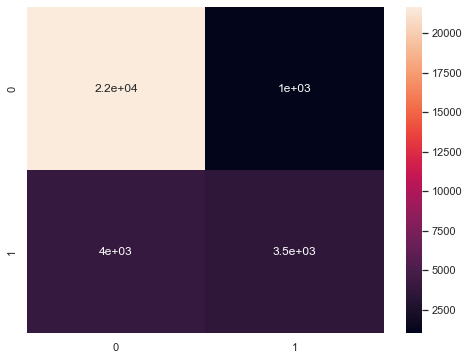

In [56]:
print('accuracyscore is    : ',round(accuracy_score(y_train,y_train_pred_rbf),3))
print('precision is        : ',round(precision_score(y_train,y_train_pred_rbf),3))
print('AUc score is        : ',round(roc_auc_score(y_train,y_train_pred_rbf),3))
print('recall value is     : ',round(recall_score(y_train,y_train_pred_rbf),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred_rbf)
sns.heatmap(data = confu_matrix,
            annot=True)

### Test

In [64]:
y_test_pred_rbf = model_rbf.predict(x_test)

accuracyscore is    :  0.834
precision is        :  0.73
AUc score is        :  0.726
recall value is     :  0.514
comfusion matrix:


<AxesSubplot:>

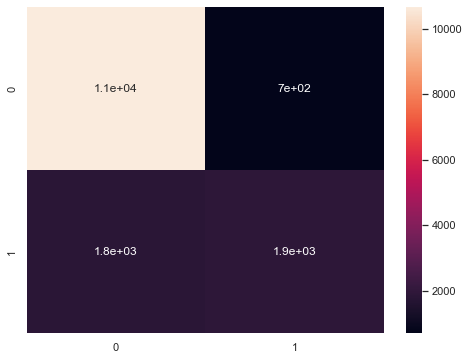

In [65]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_test_pred_rbf),3))
print('precision is        : ',round(precision_score(y_test,y_test_pred_rbf),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_test_pred_rbf),3))
print('recall value is     : ',round(recall_score(y_test,y_test_pred_rbf),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred_rbf)
sns.heatmap(data = confu_matrix,
            annot=True)

# Sigmoid 

In [66]:
model_sigmoid = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)

In [67]:
model_sigmoid.fit(x_train,y_train)

SVC(gamma=0.1, kernel='sigmoid', random_state=40)

### Train 

In [68]:
y_train_pred_sigmoid = model_sigmoid.predict(x_train)

accuracyscore is    :  0.788
precision is        :  0.633
AUc score is        :  0.643
recall value is     :  0.355
comfusion matrix:


<AxesSubplot:>

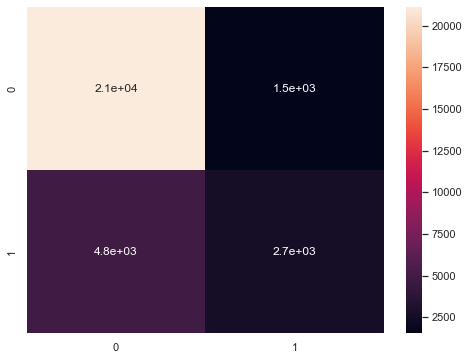

In [69]:
print('accuracyscore is    : ',round(accuracy_score(y_train,y_train_pred_sigmoid),3))
print('precision is        : ',round(precision_score(y_train,y_train_pred_sigmoid),3))
print('AUc score is        : ',round(roc_auc_score(y_train,y_train_pred_sigmoid),3))
print('recall value is     : ',round(recall_score(y_train,y_train_pred_sigmoid),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_train,y_train_pred_sigmoid)
sns.heatmap(data = confu_matrix,
            annot=True)

### Test

In [70]:
y_test_pred_sigmoid = model_rbf.predict(x_test)

accuracyscore is    :  0.834
precision is        :  0.73
AUc score is        :  0.726
recall value is     :  0.514
comfusion matrix:


<AxesSubplot:>

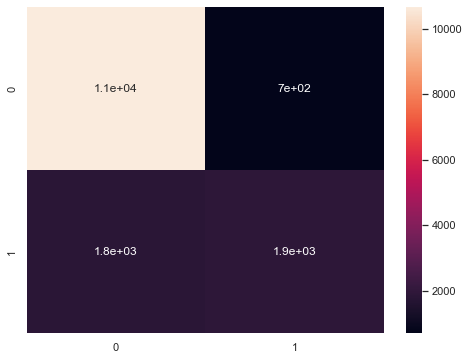

In [71]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_test_pred_sigmoid),3))
print('precision is        : ',round(precision_score(y_test,y_test_pred_sigmoid),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_test_pred_sigmoid),3))
print('recall value is     : ',round(recall_score(y_test,y_test_pred_sigmoid),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_test_pred_sigmoid)
sns.heatmap(data = confu_matrix,
            annot=True)